<a href="https://colab.research.google.com/github/schueler-gthb/showcase-projects/blob/main/Machine_Learning_and_Deep_Learning_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Load the Drive module:
from google.colab import drive

# Authenticate user manually
from google.colab import auth
auth.authenticate_user()

# Mount the drive
drive.mount('/content/drive')

# List the contents of MyDrive
!ls "/content/drive/MyDrive"

Mounted at /content/drive
'Additional Factors Summary Statistics.gsheet'	'Introduction to Coding and AI (BX)'
'Build AI for a Better Society'			'Learning Insights (Bachelor)'
'Build Your Dream Team '			'Mission Identification (Bachelor)'
'Business and Society'				'Orientation Group Challenge - 2023'
'Calibration Phase - Onboarding Time! '		 pairplot_df-encoded.png
 cars_dataset.csv				 pairplot_machinelearning.png
'Colab Notebooks'				 pairplot.pdf
 correlation_heatmap.pdf			 pairplot.png
'Data Products'					'Problem Solving with Data'
'Data Storytelling for Impact'			'Strategy & Global Markets'
 final_dataset.csv				'Sustainability Foundations (Bx)'
'Foundations for Tech Impact'			'Technology Revolutions'


## Machine Learning and Deep Learning Notebook
*   **Task:** Predict the CO2 emissions of cars utilizing a neural network and a supervised machine learning model.

*   **Dataset:** `final_dataset.csv`



In [7]:
#Import Pandas
import pandas as pd

In [12]:
# Importing data
# Creating DataFrame
# Storing DataFrame in a variable
df = pd.read_csv("/content/drive/MyDrive/final_dataset.csv")

# Columns of the Dataset

In [16]:
# Get the column names
columns = df.columns

# Create a Markdown table string
markdown_table = "| Column Index | Column Name |\n|--------------|-------------|\n"
for i, col in enumerate(columns):
    markdown_table += f"| {i} | {col} |\n"

# Display the table in a text cell using Markdown
from IPython.display import display, Markdown

display(Markdown(markdown_table))

| Column Index | Column Name |
|--------------|-------------|
| 0 | uuid |
| 1 | Make |
| 2 | Model |
| 3 | Vehicle Class |
| 4 | Engine Size(L) |
| 5 | Cylinders |
| 6 | Transmission |
| 7 | Fuel Type |
| 8 | Fuel Consumption City (L/100 km) |
| 9 | Fuel Consumption Hwy (L/100 km) |
| 10 | Fuel Consumption Comb (L/100 km) |
| 11 | Fuel Consumption Comb (mpg) |
| 12 | CO2 Emissions(g/km) |


In [17]:
# Dropping unneccessary columns
columns_to_drop = ['uuid', 'Make', 'Vehicle Class', 'Transmission', 'Fuel Type', 'Model']
df.drop(columns=columns_to_drop, inplace=True)

In [18]:
# Importing train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

In [19]:
# Define X and y
X = df.drop(['CO2 Emissions(g/km)'], axis=1)  # Drop the target column 'CO2 Emissions(g/km)'
y = df['CO2 Emissions(g/km)']  # Target column 'CO2 Emissions(g/km)' as y

In [23]:
# Splitting the data into training and testing sets with a test size of 20% and random state of 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [24]:
# Print the first few rows of the training set
print("Training set:")
print(X_train.head())
print(y_train.head())

# Print the first few rows of the testing set
print("\nTesting set:")
print(X_test.head())
print(y_test.head())

Training set:
      Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
1095             3.5          6                              12.7   
3538             5.7          8                              16.1   
2377             3.0          6                              11.8   
3414             1.4          4                               8.7   
880              3.6          6                              12.3   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
1095                              9.5                              11.3   
3538                             11.0                              13.8   
2377                              8.4                              10.3   
3414                              7.1                               8.0   
880                               8.2                              10.4   

      Fuel Consumption Comb (mpg)  
1095                           25  
3538                           20  
2377        

# Random Forest

The optimized model used was the random forest model.
A random forest model is a supervised machine learning algorithm. It “combines the output of
multiple decision trees to reach a single result.

It’s use and flexibility have also fueled its
adoption,” (IBM, n.d.).


The table below summarizes the performance metrics of the random forest model and its
accuracy.

| Metric                               | Value                |
|--------------------------------------|----------------------|
| Random Forest Accuracy               | 0.5396073121191605   |
| Random Forest Mean Squared Error (MSE)     | 41.3696682464455     |
| Random Forest R-squared (R^2)             | 0.9884923876429129   |
| Random Forest Root Mean Squared Error (RMSE) | 6.4319257028082575   |

Although the accuracy of the random forest model is not that high, its performance metrics
speaks for its excellent performance.


The MSE “measures the amount of error in statistical models. It assesses the average
squared difference between the observed and predicted values. When a model has no error,
the MSE equals zero,” (Statistics by Jim, n.d.). An MSE of 41.37 is considered low, indicating
the predicted values are quite accurate in terms of deviation from the actual values.


An RMSE “is one of the two main performance indicators for a regression model.

It measures the average difference between values predicted by a model and the actual values. It
provides an estimation of how well the model is able to predict the target value (accuracy),”
(SAP, n.d.).

An RMSE of 6.43 is considered low, indicating the predicted values are quite
accurate in terms of deviation from the actual values.


Lastly, we look at the r-squared value. The r-squared value of 0.99 is a very positive indicator
for the model.

An r-squared value “shows how well the data fit the regression model (the
goodness of fit,” (Taylor, n.d.).

An r-squared of 0.99 suggests a very strong correlation between predicted and actual values.

R-squared ranges from 0 to 1, where when it is closer to one it suggests that there is more
variance in the target variable captured by the model. An r-squared value of 0.99 is very high
and one can conclude that the model fits the data extremely well.

Essentially, with the exception of the accuracy, the performance metrics indicate a well-
performing model.

To compare with the results of the initial model, the table below shows what the initial model’s
performance metrics were.


In [25]:
# Importing RandomForestClassifier and metrics modules from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy (or any other desired evaluation metric)
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.5396073121191605


In [28]:
# Importing necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np

# Assuming you have already trained the model with the given code
# rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
# rf_model.fit(X_train, y_train)

# Create a new DataFrame 'new_data' with the same features as 'X'
new_data = pd.DataFrame([([0] * len(X.columns))], columns=X.columns)

# Assuming 'new_data' has the same features as 'X', you can make predictions as follows:
y_pred_new = rf_model.predict(new_data)

# The 'y_pred_new' variable now contains the predicted classes for the new data.

# If you are using the RandomForestClassifier for regression, you can predict continuous values like this:
y_pred_new_regression = rf_model.predict(new_data)

# The 'y_pred_new_regression' variable now contains the predicted values for the new data.

# Evaluating the model on test data
# Assuming you already have y_test (the true target values) and y_pred_rf (predicted values on the test set)

# Calculate Mean Squared Error (MSE) on the test set
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)

# Calculate R-squared (R^2) on the test set
r_squared_rf = metrics.r2_score(y_test, y_pred_rf)

# Calculate Root Mean Squared Error (RMSE) on the test set
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Mean Squared Error (MSE):", mse_rf)
print("Random Forest R-squared (R^2):", r_squared_rf)
print("Random Forest Root Mean Squared Error (RMSE):", rmse_rf)


Random Forest Mean Squared Error (MSE): 41.3696682464455
Random Forest R-squared (R^2): 0.9884923876429129
Random Forest Root Mean Squared Error (RMSE): 6.4319257028082575


In [29]:
# Importing necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Assuming you have already trained the model with the given code
# rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
# rf_model.fit(X_train, y_train)

# Create a new DataFrame 'new_data' with the same features as 'X'
new_data = pd.DataFrame(columns=X.columns)

# Add a single dummy row to 'new_data' using pandas.concat()
new_row = pd.DataFrame([[0] * len(X.columns)], columns=X.columns)
new_data = pd.concat([new_data, new_row], ignore_index=True)

# Assuming 'new_data' has the same features as 'X', you can make predictions as follows:
y_pred_new = rf_model.predict(new_data)

# The 'y_pred_new' variable now contains the predicted classes for the new data.

# If you are using the RandomForestClassifier for regression, you can predict continuous values like this:
y_pred_new_regression = rf_model.predict(new_data)

# The 'y_pred_new_regression' variable now contains the predicted values for the new data.

# Show the predicted output for classification (predicted classes)
print("Predicted Classes for New Data:")
print(y_pred_new)

# Show the predicted output for regression (predicted values)
print("Predicted Values for New Data:")
print(y_pred_new_regression)


Predicted Classes for New Data:
[96]
Predicted Values for New Data:
[96]


In [30]:
# Importing necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Assuming you have already trained the model with the given code
# rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
# rf_model.fit(X_train, y_train)

# Load your new data with feature values for over 1,400 data points.
# Ensure that 'new_data' has the same features as 'X_train' (excluding the target column).
# Replace this with the actual data containing feature values for each data point you want to predict.
new_data = pd.read_csv("/content/drive/MyDrive/final_dataset.csv")

# Drop the target column 'CO2 Emissions(g/km)' from 'new_data' if it's present
if 'CO2 Emissions(g/km)' in new_data.columns:
    new_data.drop(columns=['CO2 Emissions(g/km)'], inplace=True)

# Drop the columns that were dropped from the training data
columns_to_drop = ['uuid', 'Make', 'Vehicle Class', 'Transmission', 'Fuel Type', 'Model']
new_data.drop(columns=columns_to_drop, inplace=True)

# Assuming 'new_data' has the same features (except the dropped ones and target column) as 'X_train', you can make predictions as follows:
y_pred_new = rf_model.predict(new_data)

# The 'y_pred_new' variable now contains the predicted classes for each data point in 'new_data'.

# Show the predicted output for classification (predicted classes)
print("Predicted Classes for New Data:")
for prediction in y_pred_new:
    print(prediction)


Streaming output truncated to the last 5000 lines.
217
292
285
338
187
380
218
235
239
295
214
209
248
275
275
248
290
294
242
306
312
223
176
293
192
240
300
325
226
287
182
214
227
244
210
360
317
250
386
212
290
393
252
218
382
311
274
307
234
300
270
321
248
193
191
196
137
305
258
186
271
307
313
296
196
222
241
312
228
303
432
259
210
356
197
235
209
325
198
339
283
196
210
180
293
301
299
172
265
193
259
292
336
268
296
170
226
247
206
264
182
248
225
218
227
312
227
238
211
239
267
182
244
352
194
294
283
184
274
218
226
210
242
228
345
209
242
170
288
171
137
274
264
322
324
278
256
226
281
227
269
114
202
334
228
197
191
219
225
291
305
298
267
369
235
303
232
262
278
253
256
260
411
173
209
220
310
193
269
334
292
221
204
190
214
314
202
108
266
210
153
175
193
225
138
299
173
205
219
273
197
286
201
210
254
306
251
257
200
341
186
263
218
232
234
302
207
219
230
375
214
189
312
281
194
272
241
271
181
232
295
195
195
278
200
324
246
221
235
298
188
170
214
260
171
221
197
1

# Prediction of CO2 Emissions

In [31]:
# Importing necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

new_data = pd.read_csv("/content/drive/MyDrive/final_dataset.csv")

# Drop the target column 'CO2 Emissions(g/km)' from 'new_data' if it's present
if 'CO2 Emissions(g/km)' in new_data.columns:
    new_data.drop(columns=['CO2 Emissions(g/km)'], inplace=True)

# Drop the columns that were dropped from the training data
columns_to_drop = ['uuid', 'Make', 'Vehicle Class', 'Transmission', 'Fuel Type', 'Model']
new_data.drop(columns=columns_to_drop, inplace=True)

# Assuming 'new_data' has the same features (except the dropped ones and target column) as 'X_train',
# and you have standardized the data, you can make predictions as follows:
y_pred_new_regression = rf_model.predict(new_data)

# Show the predicted output for regression (predicted CO2 values) and the true CO2 values
print("Predicted and True CO2 Values for New Data:")
for i, y_pred in enumerate(y_pred_new_regression):
    if i < len(y_test):
        print(f"Sample {i + 1}: Predicted CO2 Emissions = {y_pred}, True CO2 Emissions = {y_test.values[i]}")


Predicted and True CO2 Values for New Data:
Sample 1: Predicted CO2 Emissions = 337, True CO2 Emissions = 216
Sample 2: Predicted CO2 Emissions = 274, True CO2 Emissions = 177
Sample 3: Predicted CO2 Emissions = 257, True CO2 Emissions = 321
Sample 4: Predicted CO2 Emissions = 337, True CO2 Emissions = 209
Sample 5: Predicted CO2 Emissions = 230, True CO2 Emissions = 168
Sample 6: Predicted CO2 Emissions = 221, True CO2 Emissions = 209
Sample 7: Predicted CO2 Emissions = 289, True CO2 Emissions = 339
Sample 8: Predicted CO2 Emissions = 224, True CO2 Emissions = 228
Sample 9: Predicted CO2 Emissions = 300, True CO2 Emissions = 257
Sample 10: Predicted CO2 Emissions = 327, True CO2 Emissions = 201
Sample 11: Predicted CO2 Emissions = 219, True CO2 Emissions = 147
Sample 12: Predicted CO2 Emissions = 196, True CO2 Emissions = 218
Sample 13: Predicted CO2 Emissions = 244, True CO2 Emissions = 168
Sample 14: Predicted CO2 Emissions = 390, True CO2 Emissions = 196
Sample 15: Predicted CO2 Em

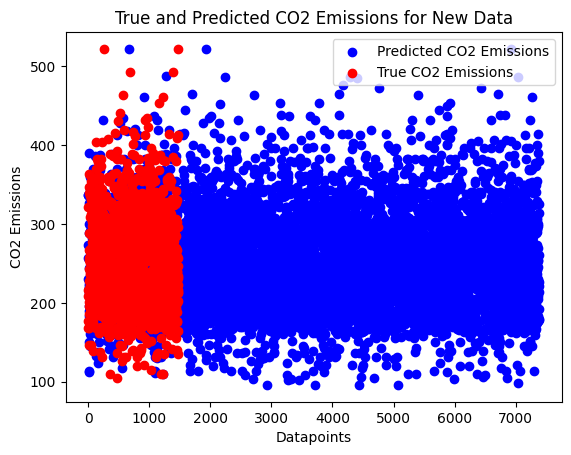

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

new_data = pd.read_csv("/content/drive/MyDrive/final_dataset.csv")

# Drop the target column 'CO2 Emissions(g/km)' from 'new_data' if it's present
if 'CO2 Emissions(g/km)' in new_data.columns:
    new_data.drop(columns=['CO2 Emissions(g/km)'], inplace=True)

# Drop the columns that were dropped from the training data
columns_to_drop = ['uuid', 'Make', 'Vehicle Class', 'Transmission', 'Fuel Type', 'Model']
new_data.drop(columns=columns_to_drop, inplace=True)

# Assuming 'new_data' has the same features (except the dropped ones and target column) as 'X_train',
# and you have standardized the data, you can make predictions as follows:
y_pred_new_regression = rf_model.predict(new_data)

# Create a DataFrame with the predicted CO2 values for easy plotting
results_df = pd.DataFrame({'Predicted CO2 Emissions': y_pred_new_regression})

# Reset the index of y_test to ensure proper alignment
y_test.reset_index(drop=True, inplace=True)

# Plotting the 'Predicted CO2' against the data index (as we don't have true CO2 values for new_data)
plt.scatter(range(len(results_df)), results_df['Predicted CO2 Emissions'], c='b', label='Predicted CO2 Emissions')

# Plotting the true CO2 values for the original data (assuming you still have y_test available)
plt.scatter(range(len(y_test)), y_test, c='r', label='True CO2 Emissions')

plt.xlabel("Datapoints")
plt.ylabel("CO2 Emissions")
plt.title("True and Predicted CO2 Emissions for New Data")
plt.legend()
plt.show()
